# EDA on sales data

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [3]:
sales = pd.read_csv('/home/salohuddin/Desktop/pandas/sales_data_sample.csv', encoding='ISO-8859-1')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# Display all the columns
pd.set_option('display.max_columns', None)

0. Dropping columns irrelevant for anlaysis 

In [5]:
sales.drop(columns=['ORDERLINENUMBER', 'PHONE', 'POSTALCODE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], inplace=True)
sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY',
       'STATE', 'COUNTRY', 'TERRITORY', 'DEALSIZE'],
      dtype='object')

# 1. Data Cleaning

1. Correct PRICEEACH column

In [6]:
# Round SALES and PRICEEACH columns to two decimal places.
sales[['SALES', 'PRICEEACH']] = sales[['SALES', 'PRICEEACH']].round(2)

In [7]:
# Check SALES columns is equal to product of PRICEEACH and QUANTITYORDERED
sales['SALES_'] = (sales['QUANTITYORDERED'] * sales['PRICEEACH']).round(2)
sales.loc[sales['SALES'] != sales['SALES_'], ['SALES', 'QUANTITYORDERED', 'PRICEEACH','SALES_']]


,SALES,QUANTITYORDERED,PRICEEACH,SALES_
4,5205.27,49,100.0,4900.0
7,5512.32,48,100.0,4800.0
9,4708.44,41,100.0,4100.0
10,3965.66,37,100.0,3700.0
11,2333.12,23,100.0,2300.0
...,...,...,...,...
2741,3789.72,36,100.0,3600.0
2764,4277.35,35,100.0,3500.0
2818,2244.40,20,100.0,2000.0
2819,3978.51,29,100.0,2900.0


In [8]:
# PRICEEACH column seems to have been rounded down to 100 when the value is higher than 100. Assuming SALES column contains accurate 
# information, PRICEEACH column should filled with SALES/QUANTITYORDERED when the the value is equal to 100
 
sales.loc[sales['PRICEEACH'] == 100, 'PRICEEACH'] = sales['SALES'] / sales['QUANTITYORDERED']


In [9]:
# Recheck
sales['SALES_'] = (sales['QUANTITYORDERED'] * sales['PRICEEACH']).round(2)
sales.loc[sales['SALES'] != sales['SALES_'], ['SALES', 'QUANTITYORDERED', 'PRICEEACH','SALES_']]

# We can now drop the new SALES_ column
sales.drop(columns='SALES_', axis=1, inplace=True)


2. Convert ORDERDATE column to a datetime format

In [10]:
sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'], format='%m/%d/%Y %H:%M')
sales['ORDERDATE']

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]

2. Tidy up NaN/NULL/empty rows

In [11]:
sales[sales['ADDRESSLINE2'].isna()]
sales[sales['ADDRESSLINE2'].isna()].shape


(2521, 20)

In [12]:
# ADDRESSLINE2 has nan values in 2521 rows

sales[sales['ADDRESSLINE2'].notna()]['ADDRESSLINE2'].unique() # reveals that ADDRESSLINE2 is company's location within a building

array(['Level 3', 'Suite 101', 'Level 6', 'Suite 750', 'Level 15',
       '2nd Floor', 'Suite 400', 'Floor No. 4', 'Suite 200'], dtype=object)

In [13]:
# Because the information in ADDRESSLINE2 is not relevant for the analysis, we drop the column
sales.drop(columns='ADDRESSLINE2', inplace=True)

In [14]:
sales[sales['STATE'].isna()][['STATE', 'COUNTRY']]
sales[(sales['COUNTRY'] == 'USA') & (sales['STATE'].isna())]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE


In [15]:
# STATE columns is empty when COUNTRY is other than USA
# Because counties other than USA do not have states, State column for them is filled with '-'
sales['STATE'] = sales['STATE'].fillna('-')

In [16]:
sales[sales['TERRITORY'].notna()]['COUNTRY'].unique()
sales[sales['TERRITORY'].isna()]['COUNTRY'].unique()


array(['USA', 'Canada'], dtype=object)

In [17]:
# TERRITORY is empty for USA and Canada
# TERRITORY for Canada and USA in COUNTRY is repalced with CUSA
sales['TERRITORY'] = sales['TERRITORY'].fillna('CUSA')


4. Checking for duplicates

In [18]:
sales[sales.duplicated()]
sales[sales.duplicated(subset=['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE',
       'COUNTRY', 'TERRITORY', 'DEALSIZE'])]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE


No duplicates found

In [19]:
sales['STATUS'].unique()
sales['STATUS'].value_counts(normalize=True)

STATUS
Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: proportion, dtype: float64

In [20]:
sales['STATUS'].value_counts(normalize=True) # Roughly 8% of rows have STATUS of other than 'Shipped'. 

# We drop them
sales = sales[sales['STATUS'] == 'Shipped']

5. Standartizing TERRITORY

In [21]:
sales['TERRITORY'].unique() # reveals that Japan is listed as one of the regions even though it should fall under APAC.

array(['CUSA', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [22]:
sales[sales['TERRITORY'] == 'Japan']['COUNTRY'].unique() # reveals that TERRITORY is marked as Japan for three countries

array(['Singapore', 'Japan', 'Philippines'], dtype=object)

In [23]:
# Replace TERRITORY Japan with APAC
sales.loc[sales['TERRITORY'] == 'Japan', 'TERRITORY'] = 'APAC'
sales.TERRITORY.unique()

array(['CUSA', 'EMEA', 'APAC'], dtype=object)

In [24]:
# Check other TERRITORY name and COUNTRY pairs are accurate
sales.groupby(['TERRITORY', 'COUNTRY'])['COUNTRY'].unique()

TERRITORY  COUNTRY    
APAC       Australia        [Australia]
           Japan                [Japan]
           Philippines    [Philippines]
           Singapore        [Singapore]
CUSA       Canada              [Canada]
           USA                    [USA]
EMEA       Austria            [Austria]
           Belgium            [Belgium]
           Denmark            [Denmark]
           Finland            [Finland]
           France              [France]
           Germany            [Germany]
           Ireland            [Ireland]
           Italy                [Italy]
           Norway              [Norway]
           Spain                [Spain]
           Sweden              [Sweden]
           Switzerland    [Switzerland]
           UK                      [UK]
Name: COUNTRY, dtype: object

# 2. Exploratory Data Analysis

In [25]:
sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE',
       'COUNTRY', 'TERRITORY', 'DEALSIZE'],
      dtype='object')

In [26]:
# Yearly sales
yearly_sales = sales.groupby('YEAR_ID')['SALES'].sum()

# Sort by the value of sales
yearly_sales.sort_values()

YEAR_ID
2005    1323735.83
2003    3439718.03
2004    4528047.22
Name: SALES, dtype: float64

2004 had the highest volume of sales

<Axes: xlabel='YEAR_ID'>

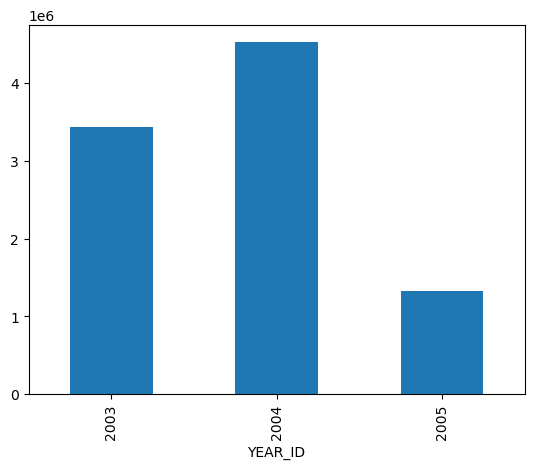

In [27]:
yearly_sales.plot(x='YEAR_ID', y='SALES', kind='bar')

In [28]:
# Sales by product line thorugh years
yearly_sales_by_product = sales.groupby(['YEAR_ID', 'PRODUCTLINE'])[['SALES']].sum().reset_index().set_index('YEAR_ID')
yearly_sales_by_product.sort_values(['YEAR_ID', 'SALES'], ascending=[True, False])

,PRODUCTLINE,SALES
YEAR_ID,,
2003,Classic Cars,1472129.04
2003,Vintage Cars,639997.45
2003,Trucks and Buses,399957.18
2003,Motorcycles,370895.58
2003,Planes,263358.00
2003,Ships,220578.49
2003,Trains,72802.29
2004,Classic Cars,1702871.52
2004,Vintage Cars,883004.44


In [36]:
# Quarterly sales in each year
quarterly_sales = sales.groupby(['YEAR_ID' ,'QTR_ID'])['SALES'].sum().reset_index().set_index('YEAR_ID')
# Sort by highest quarterly sales
quarterly_sales.sort_values(['YEAR_ID', 'SALES'], ascending=[True, False])

,QTR_ID,SALES
YEAR_ID,,
2003,4,1782743.58
2003,3,649514.54
2003,2,562365.22
2003,1,445094.69
2004,4,1964436.10
2004,3,1109396.27
2004,1,833730.68
2004,2,620484.17
2005,1,973903.28


In [37]:
# Quarters with the highest sales volume in each year
quarterly_sales.sort_values(by=['YEAR_ID', 'SALES'], ascending=[True, False])

filt = quarterly_sales.groupby('YEAR_ID')['SALES'].max()
quarterly_sales.loc[quarterly_sales['SALES'].isin(filt)]

,QTR_ID,SALES
YEAR_ID,,
2003,4,1782743.58
2004,4,1964436.10
2005,1,973903.28


In [31]:
# Monthly sales in each year 
monthly_sales = sales.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].agg('sum').reset_index().set_index('YEAR_ID')
monthly_sales

,MONTH_ID,SALES
YEAR_ID,,
2003,1,129753.60
2003,2,140836.19
2003,3,174504.90
2003,4,201609.55
2003,5,192673.11
2003,6,168082.56
2003,7,187731.88
2003,8,197809.30
2003,9,263973.36


In [32]:
# Months with the highest sales volume in each year
monthly_sales.loc[monthly_sales['SALES'].isin(monthly_sales.groupby(['YEAR_ID'])[['SALES']].max()['SALES'].unique())]

,MONTH_ID,SALES
YEAR_ID,,
2003,11,1029837.66
2004,11,1038709.19
2005,2,358186.18


In [35]:
# Monthly percentage change in sales over the years
percent_change = ((monthly_sales['SALES'] - monthly_sales['SALES'].shift(1)) / monthly_sales['SALES'].shift(1) * 100).round(2).astype(str)
monthly_change = pd.concat([monthly_sales, percent_change.rename('% change from previous month')], axis=1).loc[1:]
monthly_change

,MONTH_ID,SALES,% change from previous month
YEAR_ID,,,
2003,1,129753.60,nan
2003,2,140836.19,8.54
2003,3,174504.90,23.91
2003,4,201609.55,15.53
2003,5,192673.11,-4.43
2003,6,168082.56,-12.76
2003,7,187731.88,11.69
2003,8,197809.30,5.37
2003,9,263973.36,33.45


In [51]:
# Most profitable productlines in each month
product_sales_by_month = sales.groupby(['YEAR_ID', 'MONTH_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index().set_index('YEAR_ID')
product_sales_by_month.groupby(['YEAR_ID', 'MONTH_ID'])[['PRODUCTLINE', 'SALES']].max()

PRODUCTLINE      SALES
YEAR_ID MONTH_ID                         
2003    1         Vintage Cars   46826.84
        2         Vintage Cars   39205.31
        3         Vintage Cars  105026.68
        4         Vintage Cars   59873.60
        5         Vintage Cars   98179.48
        6         Vintage Cars   50256.79
        7         Vintage Cars   94055.58
        8         Vintage Cars   48406.61
        9         Vintage Cars  137666.87
        10        Vintage Cars  228489.18
        11        Vintage Cars  452924.37
        12        Vintage Cars  135593.69
2004    1         Vintage Cars  122791.55
        2         Vintage Cars  133034.82
        3         Vintage Cars   81144.00
        4         Vintage Cars   91815.89
        5         Vintage Cars   80471.76
        6         Vintage Cars   47237.41
        7         Vintage Cars  151237.37
        8         Vintage Cars  216895.82
        9         Vintage Cars   97006.21
        10        Vintage Cars  223856.81
        11        Vintage Cars  366164.97
        12        Vintage Cars  101697.38
2005    1         Vintage Cars  120019.98
        2         Vintage Cars  146148.57
        3         Vintage Cars   91389.86
        4         Vintage Cars   54869.61
        5         Vintage Cars  123859.57

As the above table shows, Vintage Cars has been the most profitable line in every single month over the past three years

In [55]:
# Finding the months with highest sales for each product line
product_sales_by_month = sales.groupby(['PRODUCTLINE', 'MONTH_ID'])['SALES'].sum().reset_index().set_index('PRODUCTLINE')
# product_sales_by_month.loc[product_sales_by_month['SALES'].isin(product_sales_by_month.groupby('PRODUCTLINE')['SALES'].max())]
product_sales_by_month.groupby('PRODUCTLINE')[['MONTH_ID', 'SALES']].max()

,MONTH_ID,SALES
PRODUCTLINE,,
Classic Cars,12,819089.34
Motorcycles,12,261057.36
Planes,12,167677.52
Ships,12,126583.49
Trains,12,44794.63
Trucks and Buses,12,230680.77
Vintage Cars,12,418663.74


As the above table shows November is the best month for all the product lines in terms of sales volume.

In [59]:
# Finding the quarters with highest sales for each product line
product_sales_by_quarter = sales.groupby(['PRODUCTLINE', 'QTR_ID'])['SALES'].sum().reset_index().set_index('PRODUCTLINE')
product_sales_by_quarter.groupby('PRODUCTLINE')[['QTR_ID', "SALES"]].max().sort_values(['PRODUCTLINE', 'SALES'], ascending=[True, False])

,QTR_ID,SALES
PRODUCTLINE,,
Classic Cars,4,1508726.40
Motorcycles,4,410985.83
Planes,4,334053.31
Ships,4,206212.57
Trains,4,93392.64
Trucks and Buses,4,438155.33
Vintage Cars,4,755653.60


The above table shows that forth quarter has consistenly seen the highest sales volumes for all the product lines.

In [185]:
# Sales by region
regional_sales = sales.groupby('TERRITORY')['SALES'].sum().reset_index().set_index('TERRITORY')
regional_sales.sort_values(by='SALES', ascending=False)

,SALES
TERRITORY,
EMEA,4552272.71
CUSA,3596282.84
APAC,1142945.53


EMEA has the highest volume of sales.

In [192]:
# Sales by country
sales_by_country = sales.groupby('COUNTRY')['SALES'].sum().reset_index().set_index('COUNTRY')
sales_by_country.sort_values('SALES', ascending=False)

,SALES
COUNTRY,
USA,3372204.28
France,1067131.83
Spain,1044905.31
Australia,572273.58
UK,428472.21
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


USA is the country with the most sales.